In [106]:
import pandas as pd
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [107]:
df = pd.read_parquet('escooter_history_2022.parquet')

### DF Aufbereitung

In [108]:
df["date"] = df["datetime"].dt.date
df["day_name"] = df["datetime"].dt.day_name()
df.head()

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,registered_customer,date,day_name
0,2020-01-04 00:00:09,0.0,0.0,"clear, few clouds",9.84,14.395,81.0,0.0,True,2020-01-04,Saturday
1,2020-01-04 00:00:41,0.0,0.0,"clear, few clouds",9.84,14.395,81.0,0.0,True,2020-01-04,Saturday
2,2020-01-04 00:01:20,0.0,0.0,"clear, few clouds",9.84,14.395,81.0,0.0,True,2020-01-04,Saturday
3,2020-01-04 00:04:12,0.0,0.0,"clear, few clouds",9.84,14.395,81.0,0.0,True,2020-01-04,Saturday
4,2020-01-04 00:15:19,0.0,0.0,"clear, few clouds",9.84,14.395,81.0,0.0,True,2020-01-04,Saturday


### NA-Werte überprüfen


In [109]:
#msno.matrix(df)

### Welche Ausprägungen hat "Weather"

In [110]:
print(df["weather"].unique())

['clear, few clouds' 'cloudy, mist' 'light snow or rain or thunderstorm'
 'heacy rain or thunderstorm or snow or ice pallets']


### Dtypes des Dataframes

In [111]:
print(df.dtypes)

datetime               datetime64[ns]
holiday                       float64
workingday                    float64
weather                        object
temp                          float64
atemp                         float64
humidity                      float64
windspeed                     float64
registered_customer           boolean
date                           object
day_name                       object
dtype: object


In [112]:
print(df.describe())

            holiday    workingday          temp         atemp      humidity  \
count  3.755415e+06  3.755415e+06  3.755415e+06  3.755415e+06  3.755415e+06   
mean   2.815588e-02  6.909694e-01  2.479423e+01  2.679851e+01  5.722368e+01   
std    1.654180e-01  4.620939e-01  6.327858e+01  8.033991e+00  1.840264e+01   
min    0.000000e+00  0.000000e+00  8.200000e-01  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  1.722000e+01  2.121000e+01  4.300000e+01   
50%    0.000000e+00  1.000000e+00  2.460000e+01  2.803000e+01  5.600000e+01   
75%    0.000000e+00  1.000000e+00  2.952000e+01  3.257500e+01  7.100000e+01   
max    1.000000e+00  1.000000e+00  3.526000e+03  5.000000e+01  1.000000e+02   

          windspeed  
count  3.755415e+06  
mean   1.334635e+01  
std    8.037776e+00  
min    0.000000e+00  
25%    7.001500e+00  
50%    1.299800e+01  
75%    1.900120e+01  
max    5.699690e+01  


### Ausreiser der Temperatur auffinden und entfernen

In [113]:
print(df[df["temp"] > 100].sort_values(by= "temp", ascending = False).count())

datetime               2813
holiday                2813
workingday             2813
weather                2813
temp                   2813
atemp                  2813
humidity               2813
windspeed              2813
registered_customer    2813
date                   2813
day_name               2813
dtype: int64


In [114]:
df = df.drop(df[df.temp > 100].index)

### Temperaturverlauf des Datensatzes

In [115]:
df_date_temp_agg = df.groupby(by="date").agg({"temp": ['max', 'min', 'mean']})
df_date_temp_agg["temp"]["mean"].rolling(5, min_periods = 0).mean()

date
2020-01-04    16.489909
2020-01-05    15.452457
2020-01-06    13.116321
2020-01-07    12.100115
2020-01-08    11.609962
                ...    
2021-12-30    11.030631
2021-12-31    10.744242
2022-01-01    10.934623
2022-01-02    10.502620
2022-01-03    10.263947
Name: mean, Length: 731, dtype: float64

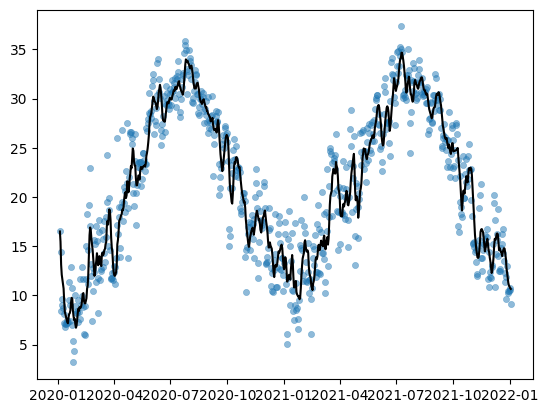

In [116]:
plt.scatter(x=df_date_temp_agg.index, y=df_date_temp_agg["temp"]['mean'], alpha=0.5, linewidths=0.4, s=20)
plt.plot(df_date_temp_agg.index, df_date_temp_agg["temp"]["mean"].rolling(7, min_periods=0).mean(), color = "black")
plt.show()

In [123]:
df_date_temp_agg.columns = ["_".join(col) for col in df_date_temp_agg.columns.values]
df_date_temp_agg.columns

Index(['temp_max', 'temp_min', 'temp_mean'], dtype='object')

In [125]:
px.line(df_date_temp_agg.rolling(7, min_periods=0).mean(), x=df_date_temp_agg.index, y=['temp_mean', 'temp_max', 'temp_min'])
#px.line(df_date_temp_agg, x=df_date_temp_agg.index, y='temp')

In [ ]:
df["week"] = (df.sort_values(by='datetime')["datetime"]-df.sort_values(by='datetime')["datetime"][0]).dt.days//7
print(df["week"])

In [ ]:
print(df.groupby("week").count()["datetime"])

In [ ]:
plt.scatter(x = df["week"].unique(), y = df.groupby("week").count()["datetime"])
plt.show()

In [ ]:
from math import ceil


print(f"Q{ceil(df['datetime'][0].month/4)}_{df['datetime'][0].year}")

df["quartal"] = f"Q{df['datetime'].dt.month//4+1}_{df['datetime'].dt.year}"
print(df["quartal"][2000000])
print(df)

In [ ]:
pd.plotting.scatter_matrix(df)

In [ ]:
df.head()